<a href="https://colab.research.google.com/github/LYZAcell/data_study/blob/main/BDA(%ED%8C%90%EB%8B%A4%EC%8A%A4)/%EA%B3%BC%EC%A0%9C/%EB%B3%B5%EC%8A%B5_%EC%9D%B4%EA%B0%80%EC%98%8141_0202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
### 문자열 조작 문법
- **str.cat** : 문자열
- 두 개의 데이터프레임 시리즈, 값 등을 연결할 때
- **str.split**: 구분자 기준 나누기
- **str.join**: 문자열 리스트 특정 구분자 연결
- **str.get**: 리스트나 튜퓰 특정 위치값 추출
- **str.slice**: 특정위칭 슬라이싱
- **str.slice_replace**: 특정위칭 슬라이싱 부분 대체
- **str.extract**: 정규표현식과 일치하는 부분을 추출
- **str.extractall**: 정규표현식과 일치하는 모든 부분 추출
- **str.replace**: 정규표현식 사용하여 문자열 대체


### 문자열 정보 문법
- **str.len**: 문자열 길이 반환
- **str.count**: 정규표현식과 일치하는 부분 개수 카운팅
- **str.startswith**: 시작여부
- **str.endswith**: 시작여부
- **str.find**: 부분 문자열 처음 나타나는 위치 반환 (rfind)
- **str.match**: 정규표현식 일치하는지 여부 반환
- **str.contains**: 정규표현식을 포함하는 여부 확인 반환


### 정규표현식

In [ ]:
import re

In [ ]:
re.match('안녕?', '안녕? 반갑습니다!')

<re.Match object; span=(0, 2), match='안녕'>

In [ ]:
re.search('안녕?', '반가워! 안녕?')

<re.Match object; span=(5, 7), match='안녕'>

In [ ]:
re.match('안녕?', '반가워! 안녕?')

- **정규표현식 패턴들**
- [0-9] / d
- [a-z]
- [A-Z]
- [가-힣]
- ^ not
- *, + 패턴 찾기!

In [ ]:
re.search('[0-9]','123145315313132132143213m,werwaerasdefasdfas123')

<re.Match object; span=(0, 1), match='1'>

In [ ]:
re.search('[0-9]+','123145315313132132143213m,werwaerasdefasdfas123')

<re.Match object; span=(0, 24), match='123145315313132132143213'>

In [ ]:
re.search('[0-9]*','123145315313132132143213m,werwaerasdefasdfas123')

<re.Match object; span=(0, 24), match='123145315313132132143213'>

### 데이터프레임 데이터를 가지고 분석해 보자!
- 기존에 배운 정규표현식을 str문법과 응용하여 사용하기!

In [ ]:
import pandas as pd

# 샘플 데이터프레임 생성
data = {
    'name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
    'email': ['alice@example.com', 'bob@example.com', 'charlie@sample.net', 'david@website.org', 'eve@domain.com'],
    'description': ['Alice is a Data Scientist.', 'Bob is an Engineer.', 'Charlie is a Doctor.', 'David is a Lawyer.', 'Eve is an Artist.']
}
df = pd.DataFrame(data)
print(df)

      name               email                 description
0    Alice   alice@example.com  Alice is a Data Scientist.
1      Bob     bob@example.com         Bob is an Engineer.
2  Charlie  charlie@sample.net        Charlie is a Doctor.
3    David   david@website.org          David is a Lawyer.
4      Eve      eve@domain.com           Eve is an Artist.


In [ ]:
df

,name,email,description
0,Alice,alice@example.com,Alice is a Data Scientist.
1,Bob,bob@example.com,Bob is an Engineer.
2,Charlie,charlie@sample.net,Charlie is a Doctor.
3,David,david@website.org,David is a Lawyer.
4,Eve,eve@domain.com,Eve is an Artist.


In [ ]:
## name 특정 문자를 연결할 때 name+email
df['name+email']=df['name'].str.cat(df['email'],sep='/')

In [ ]:
## 데이터를 나눠서 사용할 수 있다. @ 값을 기준으로 데이터 나누기
df[['user_id','domain']]=df['email'].str.split('@', expand=True)

In [ ]:
## get함수를 이용해서 특정 위치의 값들을 가지고 올 수 있다
df['name'].str.get(0)

0    A
1    B
2    C
3    D
4    E
Name: name, dtype: object

In [ ]:
##slice 로 데이터 추출 할 수 있다.
##원하는 데이터를 자유롭게 추출 가능하다!
df['name'].str.slice(start=0, stop=3)

0    Ali
1    Bob
2    Cha
3    Dav
4    Eve
Name: name, dtype: object

In [ ]:
## extract 정규표현식 추출

df['email'].str.extract(r'@(\w+\.\w+)')

,0
0,example.com
1,example.com
2,sample.net
3,website.org
4,domain.com


In [ ]:
df['description'].str.extractall(r'(\w+)')

0
  match           
0 0          Alice
  1             is
  2              a
  3           Data
  4      Scientist
1 0            Bob
  1             is
  2             an
  3       Engineer
2 0        Charlie
  1             is
  2              a
  3         Doctor
3 0          David
  1             is
  2              a
  3         Lawyer
4 0            Eve
  1             is
  2             an
  3         Artist

In [ ]:
df['description'].str.replace('is','are')

0    Alice are a Data Scientaret.
1            Bob are an Engineer.
2           Charlie are a Doctor.
3             David are a Lawyer.
4             Eve are an Artaret.
Name: description, dtype: object

In [ ]:
df['description'].str.find('Doctor')

0    -1
1    -1
2    13
3    -1
4    -1
Name: description, dtype: int64

In [ ]:
df['description'].str.contains('Doctor')

0    False
1    False
2     True
3    False
4    False
Name: description, dtype: bool

In [ ]:
## 불린값으로 나온다~?

df[df['description'].str.contains('Doctor')]

,name,email,description,name+email,user_id,domain
2,Charlie,charlie@sample.net,Charlie is a Doctor.,Charlie/charlie@sample.net,charlie,sample.net


In [ ]:
#description 에서 Doctor, Artist
# df[()&()|()] 감싸서 들어가야 한다!
df[(df['description'].str.contains('Doctor')) | (df['description'].str.contains('Artist'))]

,name,email,description,name+email,user_id,domain
2,Charlie,charlie@sample.net,Charlie is a Doctor.,Charlie/charlie@sample.net,charlie,sample.net
4,Eve,eve@domain.com,Eve is an Artist.,Eve/eve@domain.com,eve,domain.com


- 문자열 데이터를 수치로 변환
- 인코딩 작업

In [ ]:
#One-hot encoding 작업
df['domain'].str.get_dummies()

,domain.com,example.com,sample.net,website.org
0,0,1,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1
4,1,0,0,0


In [ ]:
df

,name,email,description,name+email,user_id,domain
0,Alice,alice@example.com,Alice is a Data Scientist.,Alice/alice@example.com,alice,example.com
1,Bob,bob@example.com,Bob is an Engineer.,Bob/bob@example.com,bob,example.com
2,Charlie,charlie@sample.net,Charlie is a Doctor.,Charlie/charlie@sample.net,charlie,sample.net
3,David,david@website.org,David is a Lawyer.,David/david@website.org,david,website.org
4,Eve,eve@domain.com,Eve is an Artist.,Eve/eve@domain.com,eve,domain.com


In [ ]:
df[['domain','user_id']].str.get_dummies() ## 데이터프레임은 제공하지 않는다.
# 시리즈로 꼭 변환해서 str 문법을 사용해야 한다.

AttributeError: 'DataFrame' object has no attribute 'str'

In [ ]:
# 시리즈에 맞게 문법 코드를 작성해야 한다.
#df[df[['description','user_id']].str.contains('Doctor')]

In [ ]:
#영화 리뷰 데이터로 분석해 보기!
df=pd.read_csv('movie_rv.csv')

In [ ]:
df['document'].str.split(' ', n=1, expand=True)

,0,1
0,아,더빙.. 진짜 짜증나네요 목소리
1,흠...포스터보고,초딩영화줄....오버연기조차 가볍지 않구나
2,너무재밓었다그래서보는것을추천한다,None
3,교도소,이야기구먼 ..솔직히 재미는 없다..평점 조정
4,사이몬페그의,익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무...
...,...,...
149995,인간이,문제지.. 소는 뭔죄인가..
149996,평점이,너무 낮아서...
149997,이게,뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?
149998,청춘,영화의 최고봉.방황과 우울했던 날들의 자화상


In [ ]:
df['document'].str.split(' ', n=3, expand=True)

,0,1,2,3
0,아,더빙..,진짜,짜증나네요 목소리
1,흠...포스터보고,초딩영화줄....오버연기조차,가볍지,않구나
2,너무재밓었다그래서보는것을추천한다,None,None,None
3,교도소,이야기구먼,..솔직히,재미는 없다..평점 조정
4,사이몬페그의,익살스런,연기가,돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다
...,...,...,...,...
149995,인간이,문제지..,소는,뭔죄인가..
149996,평점이,너무,낮아서...,None
149997,이게,뭐요?,한국인은,거들먹거리고 필리핀 혼혈은 착하다?
149998,청춘,영화의,최고봉.방황과,우울했던 날들의 자화상


In [ ]:
##특정 키워드를 찾을 수 있다.
list(df['document'].str.findall('최고'))

[[],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['최고'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['최고'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['최고'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['최고'],
 [],
 [],
 [],
 ['최고'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['최고'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['최고'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['최고'],
 [],
 [],
 []

In [ ]:
df['document_len']=df['document'].str.len()

(array([36766., 46098., 33551., 12015.,  6098.,  3990.,  3136.,  2231.,
         2361.,  3749.]),
 array([  1. ,  15.5,  30. ,  44.5,  59. ,  73.5,  88. , 102.5, 117. ,
        131.5, 146. ]),
 <BarContainer object of 10 artists>)

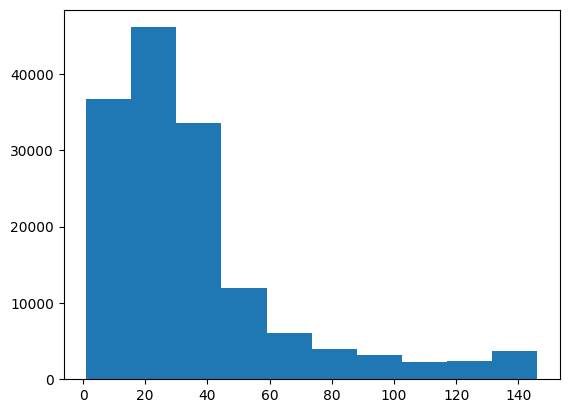

In [ ]:
import matplotlib.pyplot as plt
plt.hist(df['document_len'])

In [ ]:
#요약통계치로 확인도 가능하다!
df['document_len'].describe()

count    149995.000000
mean         35.204527
std          29.531890
min           1.000000
25%          16.000000
50%          27.000000
75%          42.000000
max         146.000000
Name: document_len, dtype: float64

In [ ]:
df.groupby('label')['document_len'].describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
0,75170.0,35.806319,30.343703,1.0,16.0,27.0,43.0,146.0
1,74825.0,34.599960,28.680707,1.0,16.0,27.0,42.0,146.0


### 필수과제1
- 긍정과 부정에 주요 핵심 키워드를 카운팅 하여서 어떤 키워드가 가장 높은 빈도를 차지하는지?
- 긍정과 부정 두 개 비교해서 상위 5개 리스트 공유

## nltk 패키지를 이용해서 영문데이터 텍스트 전처리

In [ ]:
import nltk

#nltk 라이브러리
nltk.download('punkt')
nltk.download('webtext')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /Users/jun/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package webtext to /Users/jun/nltk_data...
[nltk_data]   Package webtext is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/jun/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/jun/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/jun/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
df = 'Deep learning is the subset of machine learning methods based on artificial neural networks with representation learning. The adjective "deep" refers to the use of multiple layers in the network. Methods used can be either supervised, semi-supervised or unsupervised.'

In [ ]:
df

'Deep learning is the subset of machine learning methods based on artificial neural networks with representation learning. The adjective "deep" refers to the use of multiple layers in the network. Methods used can be either supervised, semi-supervised or unsupervised.'

- 텍스트 데이터 전처리
    - 노이즈, 분석에 불필요한 것들은 제거하고 문장을 살펴보는 것
    - 특수문자, 기타 불필요한 단어들 제거하고
        - 불용어(의미가 거의 없는 단어들 은,는,이,가 등등 제거한다.)
    - 정제(정규표현식 등으로 데이터에 노이즈를 제거한다, 필요한 것들만 추출할 준비를 한다.)
    - 토큰화 : 위에 전처리한 정제를 마친 텍스트를 원하는 단위로 자른다. 단어 토큰화, 여러 방식을 토큰화를 하는데 -> 성능을 올리기 위해서는 이러한 토큰화가 중요하다.
    - 정규화 : (동사들의 변형, 과거, 미래 등등 변화하고), 어간 추출, 표제어 추출하는 작업을 할 수 있다.
    - 품사 태깅 : (명사, 형용사 기타 등등 ) 토큰을 나눈 것에 의미를 부여해서 -> 품사를 통해 더 많은 의미있는 확보할 수 있다.
--------
- 결국은 수치로 변화 되는 것 -> 임베딩 작업
    - 빈도수로 카운팅하는 contVectorizer (Bag of Words)
    - TF-IDF
    - CBOW (Word2Vec)
    - Skip-Gram( Word2Vec)
    - Co-occurence( 동시 단어들 임베딩 작업 등 )
    - Bert
    - Transfomer
   

In [ ]:
## 문장에 대한 토큰화를 진행한다는 것?
from nltk.tokenize import sent_tokenize

print(sent_tokenize(df))

['Deep learning is the subset of machine learning methods based on artificial neural networks with representation learning.', 'The adjective "deep" refers to the use of multiple layers in the network.', 'Methods used can be either supervised, semi-supervised or unsupervised.']


In [ ]:
## 단어 토큰화
from nltk.tokenize import word_tokenize

print(word_tokenize(df))

['Deep', 'learning', 'is', 'the', 'subset', 'of', 'machine', 'learning', 'methods', 'based', 'on', 'artificial', 'neural', 'networks', 'with', 'representation', 'learning', '.', 'The', 'adjective', '``', 'deep', "''", 'refers', 'to', 'the', 'use', 'of', 'multiple', 'layers', 'in', 'the', 'network', '.', 'Methods', 'used', 'can', 'be', 'either', 'supervised', ',', 'semi-supervised', 'or', 'unsupervised', '.']


In [ ]:
## 특수문자 제거
from nltk.tokenize import WordPunctTokenizer

print(WordPunctTokenizer().tokenize(df))

['Deep', 'learning', 'is', 'the', 'subset', 'of', 'machine', 'learning', 'methods', 'based', 'on', 'artificial', 'neural', 'networks', 'with', 'representation', 'learning', '.', 'The', 'adjective', '"', 'deep', '"', 'refers', 'to', 'the', 'use', 'of', 'multiple', 'layers', 'in', 'the', 'network', '.', 'Methods', 'used', 'can', 'be', 'either', 'supervised', ',', 'semi', '-', 'supervised', 'or', 'unsupervised', '.']


In [ ]:
#정규표현식으로 내가 원하는 문자를 전처리 할 수 있다.
from nltk.tokenize import RegexpTokenizer
rt_tk=RegexpTokenizer('[\w"]+')

In [ ]:
print(rt_tk.tokenize(df))

['Deep', 'learning', 'is', 'the', 'subset', 'of', 'machine', 'learning', 'methods', 'based', 'on', 'artificial', 'neural', 'networks', 'with', 'representation', 'learning', 'The', 'adjective', '"deep"', 'refers', 'to', 'the', 'use', 'of', 'multiple', 'layers', 'in', 'the', 'network', 'Methods', 'used', 'can', 'be', 'either', 'supervised', 'semi', 'supervised', 'or', 'unsupervised']


In [ ]:
##불용어처리 (노이즈)
##stopwords

from nltk.corpus import stopwords

en_stop=set(stopwords.words('english'))

In [ ]:
tokens=rt_tk.tokenize(df.lower())

In [ ]:
print([word for word in tokens if word not in en_stop])

['deep', 'learning', 'subset', 'machine', 'learning', 'methods', 'based', 'artificial', 'neural', 'networks', 'representation', 'learning', 'adjective', '"deep"', 'refers', 'use', 'multiple', 'layers', 'network', 'methods', 'used', 'either', 'supervised', 'semi', 'supervised', 'unsupervised']


In [ ]:
df

'Deep learning is the subset of machine learning methods based on artificial neural networks with representation learning. The adjective "deep" refers to the use of multiple layers in the network. Methods used can be either supervised, semi-supervised or unsupervised.'

In [ ]:
tokens

['deep',
 'learning',
 'is',
 'the',
 'subset',
 'of',
 'machine',
 'learning',
 'methods',
 'based',
 'on',
 'artificial',
 'neural',
 'networks',
 'with',
 'representation',
 'learning',
 'the',
 'adjective',
 '"deep"',
 'refers',
 'to',
 'the',
 'use',
 'of',
 'multiple',
 'layers',
 'in',
 'the',
 'network',
 'methods',
 'used',
 'can',
 'be',
 'either',
 'supervised',
 'semi',
 'supervised',
 'or',
 'unsupervised']